In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
from ast import literal_eval
# Read the train data and preprocessing

origin_train = pd.read_csv('train.csv')
origin_test = pd.read_csv('test.csv')
sns.set_style("whitegrid")

In [10]:
# Yue will take charge of the data preproccessing from 'id' to 'production_companies'
origin_train.head()
origin_test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


Since the there are NaN value in the data spec, the space must be filled

The collection for each movie is not so common. The movie with collection can have more revenue. So we change the belongs_to_collection into new attribute name_collection. The movie with collection will have the value of the name_collection otherwise 0.

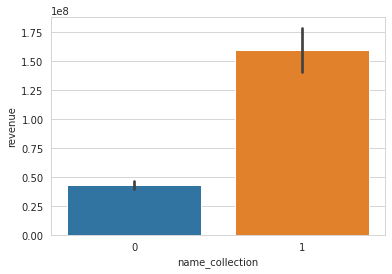

In [12]:
# relationship between revenue and collection
# Movies with collection have more revenue
origin_train.fillna(0, inplace=True)
draw_train = origin_train
draw_train['newbelongs_to_collection'] = draw_train['belongs_to_collection'].apply(lambda x: literal_eval(x) if x != 0 else 0)
draw_train['name_collection'] = draw_train['newbelongs_to_collection'].apply(lambda x: 1 if x != 0 else 0)
sns.barplot(x='name_collection',y='revenue',data=draw_train)

In [5]:
# checkout belongs_to_collection
# fill the NaN
origin_train.fillna(0, inplace=True)
origin_test.fillna(0, inplace=True)
# change the json into dic
origin_train['newbelongs_to_collection'] = origin_train['belongs_to_collection'].apply(lambda x: literal_eval(x) if x != 0 else 0)

# add one more collection name to store the collection name
origin_train['name_collection'] = origin_train['newbelongs_to_collection'].apply(lambda x: x[0]['name'] if x != 0 else 0)

# change the json into dic
origin_test['newbelongs_to_collection'] = origin_test['belongs_to_collection'].apply(lambda x: literal_eval(x) if x != 0 else 0)

# add one more collection name to store the collection name
origin_test['name_collection'] = origin_test['newbelongs_to_collection'].apply(lambda x: x[0]['name'] if x != 0 else 0)


# drop the old belongs_to_collection and newbelongs_to_collection
# origin_train.drop(['newbelongs_to_collection', 'belongs_to_collection'], axis = 1, inplace = True)
# origin_test.drop(['newbelongs_to_collection', 'belongs_to_collection'], axis = 1, inplace = True)

# change the json into dic
# sns.set_style("whitegrid")
# sns.regplot(x='id',y='revenue',data=origin_train)

The budget for some movies is 0. But in the real word, it should be really rare.

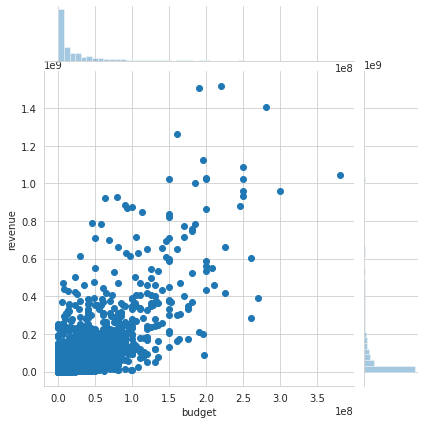

In [8]:
# checkout budget
sns.jointplot(x="budget", y="revenue", data=origin_train)